In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import Relevant Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer 

In [2]:
md, lg = 15, 20 
plt.rc('font', size=md)
plt.rc('axes', labelsize=md)
plt.rc('xtick', labelsize=md)
plt.rc('ytick', labelsize=md)
plt.rc('legend', fontsize=md)
plt.rc('figure', titlesize=lg)

In [3]:
enrol = pd.read_csv('https://raw.githubusercontent.com/KolatimiDave/13-school-progress/master/data/gross-enrollment-ratio-2013-2016.csv')

In [4]:
enrol.head(5)
enrol.shape

(110, 14)

In [5]:
boys = ['Primary_Boys','Upper_Primary_Boys','Secondary_Boys','Higher_Secondary_Boys']
girls = ['Primary_Girls','Upper_Primary_Girls','Secondary_Girls','Higher_Secondary_Girls']

In [6]:
sum(enrol.isna().sum())   #Check for missing values

0

In [7]:
enrol['State_UT'].unique(), len(enrol['State_UT'].unique())

(array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
        'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
        'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
        'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir', 'Jharkhand',
        'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
        'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
        'Odisha', 'Pondicherry', 'Punjab', 'Rajasthan', 'Sikkim',
        'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttaranchal',
        'West Bengal', 'All India', 'MADHYA PRADESH', 'Puducherry',
        'Telangana', 'Uttarakhand'], dtype=object),
 40)

In [8]:
#rename States
enrol['State_UT'].replace({'Uttaranchal': 'Uttarakhand',
                             'Pondicherry': 'Puducherry',
                             'MADHYA PRADESH':'Madhya Pradesh',
},inplace=True)

In [9]:
states = enrol['State_UT'].unique().tolist()

In [10]:
all_cols = enrol.columns.to_list()

In [11]:
obj = [i for i in all_cols if enrol[i].dtype == object]
len(obj)

5

### There are 'NR' values in the last 3 columns so I would impute 0 for all 'NR' which means 'Not Recorded'.

In [12]:
imputer = SimpleImputer(missing_values = 'NR', strategy='constant', fill_value=0)
imputer_1 = SimpleImputer(missing_values = '@', strategy='constant', fill_value=0)

In [13]:
enrol = imputer_1.fit_transform(enrol)
enrol = pd.DataFrame(imputer.fit_transform(enrol), columns=all_cols)
enrol = enrol.sort_values(by= "Year")

In [14]:
enrol.head(3)

,State_UT,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total
0,Andaman & Nicobar Islands,2013-14,95.88,91.97,93.93,94.7,88.98,91.83,102.89,97.36,100.16,105.4,96.61,101.28
20,Maharashtra,2013-14,99.93,99.68,99.81,96.93,96.76,96.69,87.5,83.39,85.58,58.87,58.66,58.77
21,Manipur,2013-14,145.68,152.81,149.15,111.62,115.08,113.31,84.81,83.78,84.3,65.46,58.91,62.18


In [15]:
categories = all_cols[2:]
enrol[categories] = enrol[categories].astype(float)

In [16]:
tmp = []
for categ in categories:
    tmp.append(pd.DataFrame({'mean_' + categ : enrol.groupby(['State_UT'])[categ].mean()}))

In [17]:
mean_enrol_per_state = pd.DataFrame(tmp[0])     # Initially add the first Student Category type in the DataFrame so it's easy to use pd.merge()
for Stu_type in range(1, len(tmp)):           # Starting at an Index of 1 since since I already initialized our dataframe with the first Student type 
    tmp[Stu_type].reset_index(inplace = True)
    mean_enrol_per_state = pd.merge(mean_enrol_per_state, tmp[Stu_type], on = 'State_UT')

In [18]:
mean_enrol_per_state.head(3)

,State_UT,mean_Primary_Boys,mean_Primary_Girls,mean_Primary_Total,mean_Upper_Primary_Boys,mean_Upper_Primary_Girls,mean_Upper_Primary_Total,mean_Secondary_Boys,mean_Secondary_Girls,mean_Secondary_Total,mean_Higher_Secondary_Boys,mean_Higher_Secondary_Girls,mean_Higher_Secondary_Total
0,All India,98.973333,101.590000,100.216667,87.58,95.203333,91.126667,78.030000,78.793333,78.386667,54.430000,53.933333,54.193333
1,Andaman & Nicobar Islands,93.306667,89.223333,91.260000,90.54,85.220000,87.863333,95.850000,90.590000,93.243333,92.323333,88.506667,90.516667
2,Andhra Pradesh,89.936667,89.676667,89.810000,81.09,81.850000,81.456667,73.283333,75.556667,74.370000,56.460000,58.376667,57.363333


In [19]:
mean_enrol_per_state.set_index('State_UT', inplace=True)
mean_enrol_per_state.head(3)

,mean_Primary_Boys,mean_Primary_Girls,mean_Primary_Total,mean_Upper_Primary_Boys,mean_Upper_Primary_Girls,mean_Upper_Primary_Total,mean_Secondary_Boys,mean_Secondary_Girls,mean_Secondary_Total,mean_Higher_Secondary_Boys,mean_Higher_Secondary_Girls,mean_Higher_Secondary_Total
State_UT,,,,,,,,,,,,
All India,98.973333,101.590000,100.216667,87.58,95.203333,91.126667,78.030000,78.793333,78.386667,54.430000,53.933333,54.193333
Andaman & Nicobar Islands,93.306667,89.223333,91.260000,90.54,85.220000,87.863333,95.850000,90.590000,93.243333,92.323333,88.506667,90.516667
Andhra Pradesh,89.936667,89.676667,89.810000,81.09,81.850000,81.456667,73.283333,75.556667,74.370000,56.460000,58.376667,57.363333


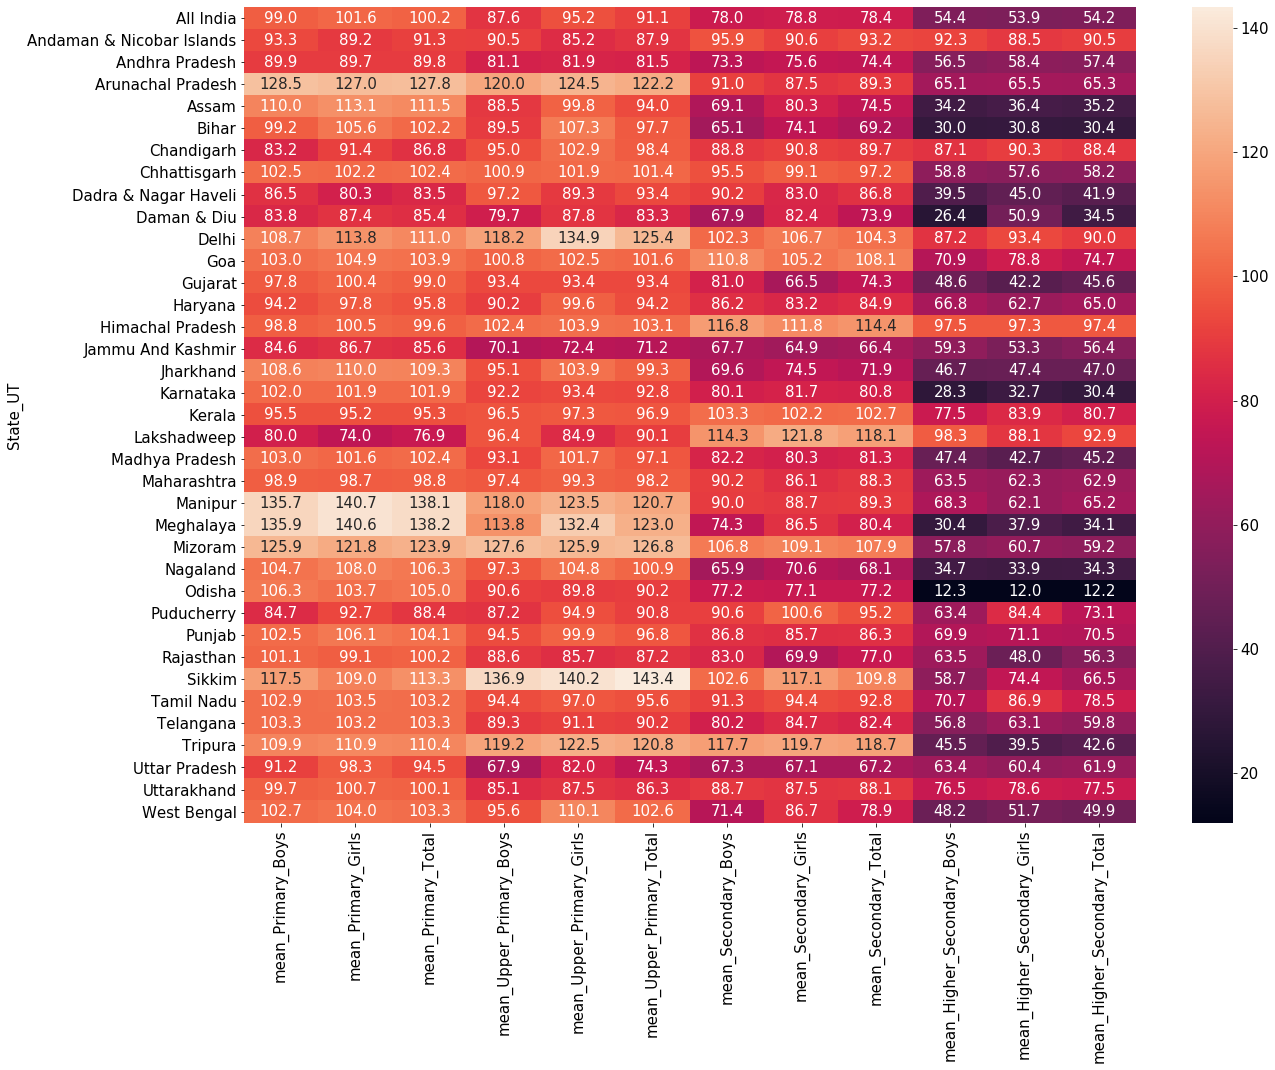

In [20]:
plt.figure(figsize=(20, 15))
sns.heatmap(mean_enrol_per_state, annot = True, fmt='.1f')

### From the above heat map we can't conclude yet which state has the overall highest and lowest gross enrollment 

## Further Exploratory Data Analysis on the Drop_out Ratio

In [21]:
mean_enrol_per_state.head(3)

,mean_Primary_Boys,mean_Primary_Girls,mean_Primary_Total,mean_Upper_Primary_Boys,mean_Upper_Primary_Girls,mean_Upper_Primary_Total,mean_Secondary_Boys,mean_Secondary_Girls,mean_Secondary_Total,mean_Higher_Secondary_Boys,mean_Higher_Secondary_Girls,mean_Higher_Secondary_Total
State_UT,,,,,,,,,,,,
All India,98.973333,101.590000,100.216667,87.58,95.203333,91.126667,78.030000,78.793333,78.386667,54.430000,53.933333,54.193333
Andaman & Nicobar Islands,93.306667,89.223333,91.260000,90.54,85.220000,87.863333,95.850000,90.590000,93.243333,92.323333,88.506667,90.516667
Andhra Pradesh,89.936667,89.676667,89.810000,81.09,81.850000,81.456667,73.283333,75.556667,74.370000,56.460000,58.376667,57.363333


In [22]:
all_mean_cols = mean_enrol_per_state.columns.to_list()               ## Get the enrol_per_state columns in a list


In [23]:
features = [i for i in all_mean_cols if i.split('_')[-1]!='Total']      ## I'ld be working with the Student types alone, without the Total columns since the Total is a composite feature of Boys and Girls.

In [24]:
total_enrol = []

for state in states:
    total_enrol.append(sum(mean_enrol_per_state.loc[state][features]))   # I could use all the features including the Total composite feature and still get similar result

In [25]:
total_enrol_per_state = pd.DataFrame(total_enrol, index=states, columns=['Total_enrol_per_state'])

In [26]:
total_enrol_per_state.head(5)

,Total_enrol_per_state
Andaman & Nicobar Islands,725.560000
Andhra Pradesh,606.230000
Arunachal Pradesh,809.096667
Assam,631.430000
Bihar,601.606667


In [27]:
sns.set_style("whitegrid")

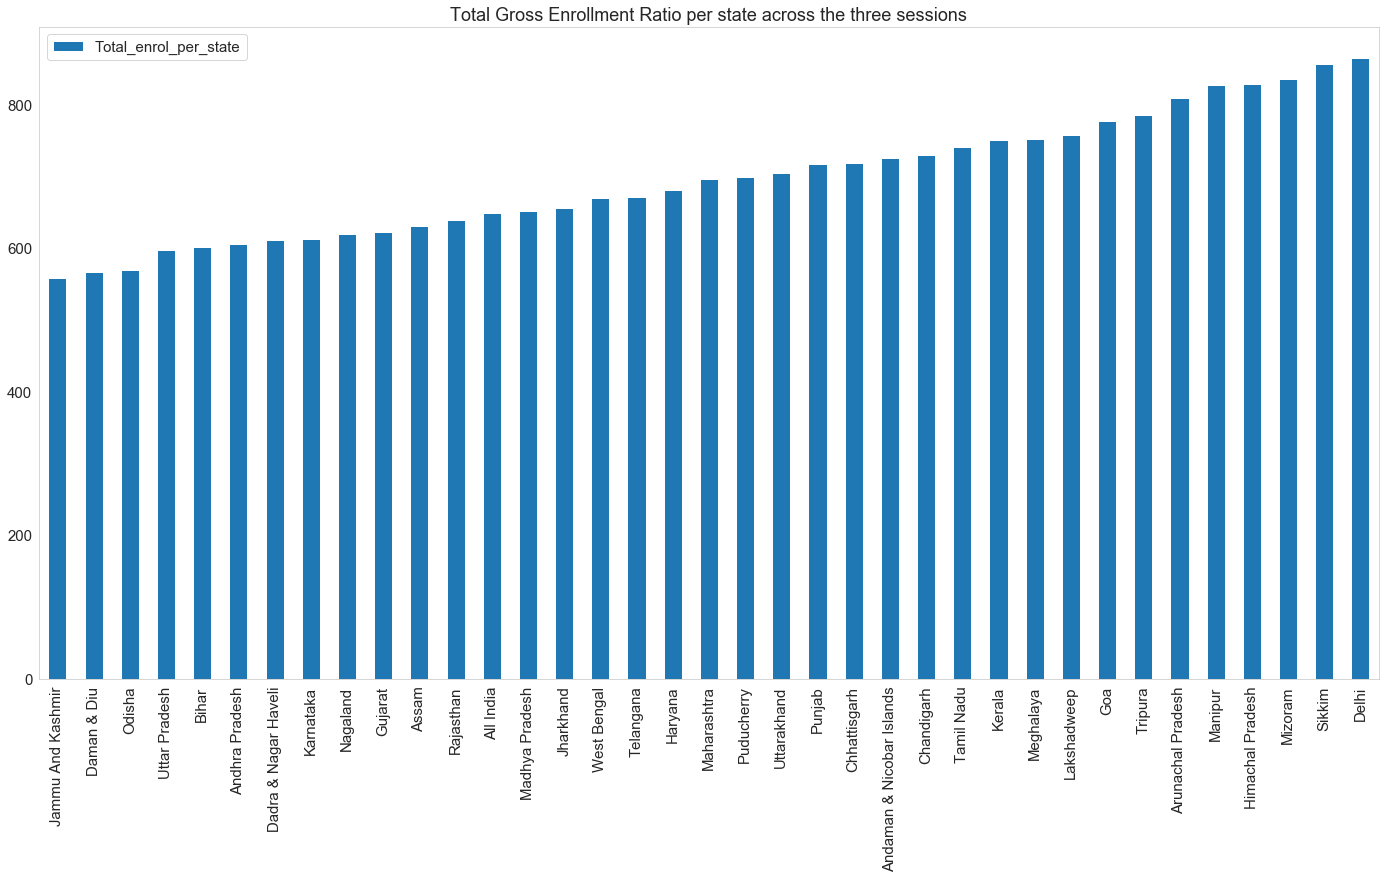

In [28]:
total_enrol_per_state.sort_values('Total_enrol_per_state').plot(kind='bar', figsize=(24,12), title ='Total Gross Enrollment Ratio per state across the three sessions')
plt.grid(False)
plt.savefig("total.png", dpi = 280)

### From the above bar chart we can see clearly that, Delhi has the highest average of enrollments in all Student category type, while 'Jammu And Kashmir' has the lowest average of enrollments in the secondary school sections.



## In-depth Exploratory Data Analysis into the Student Category Types 


In [29]:
primary = [ i for i in all_mean_cols if i.split('_')[1] == 'Primary']
Upper_primary = [ i for i in all_mean_cols if i.split('_')[1] == 'Upper']
secondary = [ i for i in all_mean_cols if i.split('_')[1] == 'Secondary']
HrSecondary = [ i for i in all_mean_cols if i.split('_')[1] == 'Higher']

## Primary Student Category (Boys)

In [30]:
primary_boys = [i for i in primary if i.split('_')[-1] == 'Boys']

In [31]:
primary_boys_total_enrol = []

for state in states:
    primary_boys_total_enrol.append(sum(mean_enrol_per_state.loc[state][primary_boys]))   # Getting the total drop out for boys in the primary Student category type.

In [32]:
primary_boys_total_enrol_per_state = pd.DataFrame(primary_boys_total_enrol, 
                                                  index=states, columns=['Primary Boys total enrol per state']
                                                 )


In [33]:
sns.set_style('white')

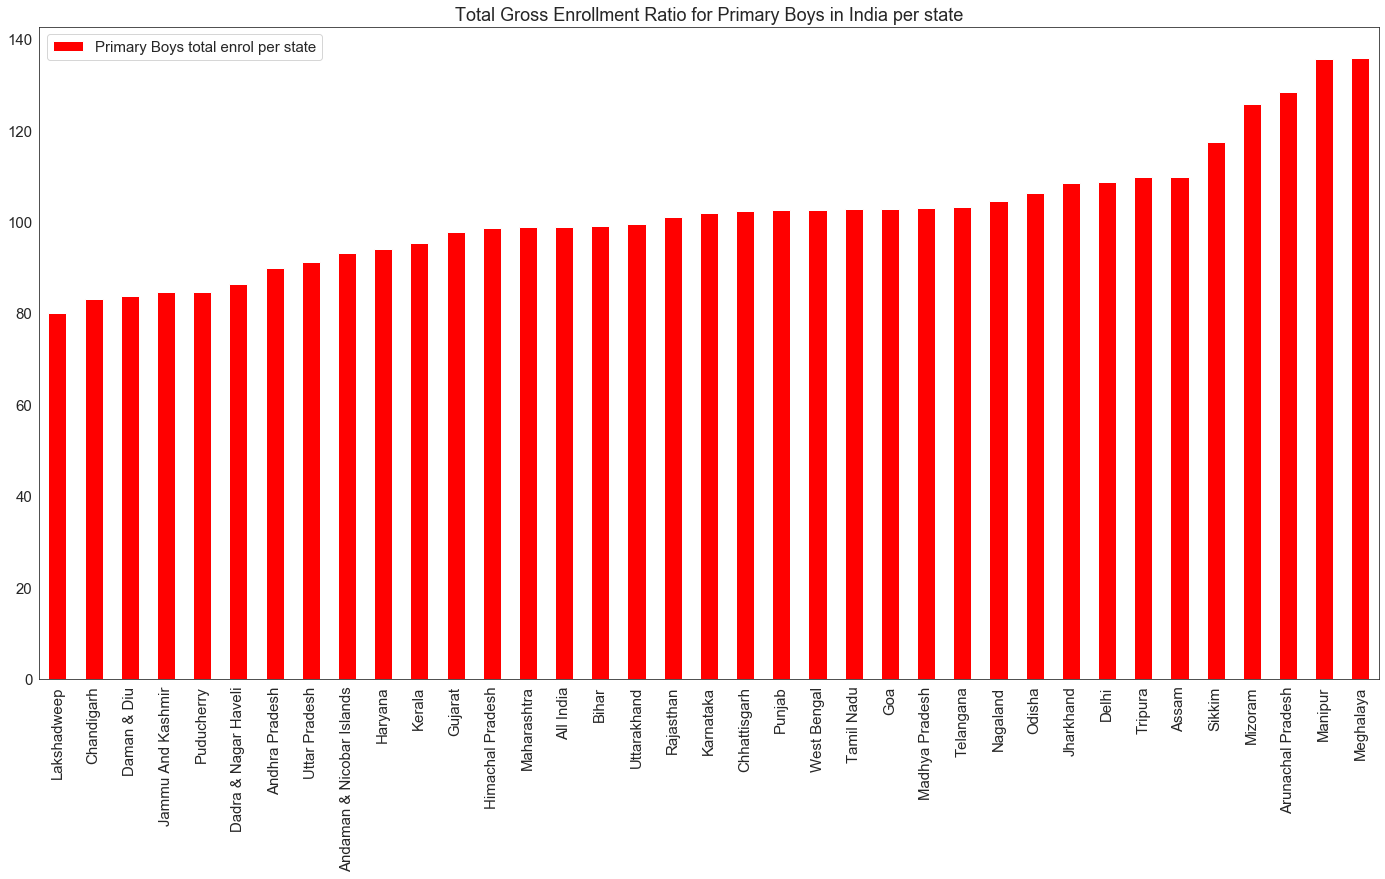

In [34]:
primary_boys_total_enrol_per_state.sort_values('Primary Boys total enrol per state').plot(kind='bar', figsize=(24,12), color = 'r', title = 'Total Gross Enrollment Ratio for Primary Boys in India per state')
plt.savefig("pryb.png", dpi = 280)
plt.grid(False)

### Lakshadweep state has the least enrollment of primary school boys, while Meghalaya state enrols the most primary school boys.

## Primary Student Category Girls

In [35]:
primary_girls = [i for i in primary if i.split('_')[-1] == 'Girls']

In [36]:
primary_girls_total_enrol = []

for state in states:
    primary_girls_total_enrol.append(sum(mean_enrol_per_state.loc[state][primary_girls]))   # Getting the total drop out for girls in the primary Student category type.

In [37]:
primary_girls_total_enrol_per_state = pd.DataFrame(primary_girls_total_enrol, index=states, columns=['Primary girls total enrol per state'])


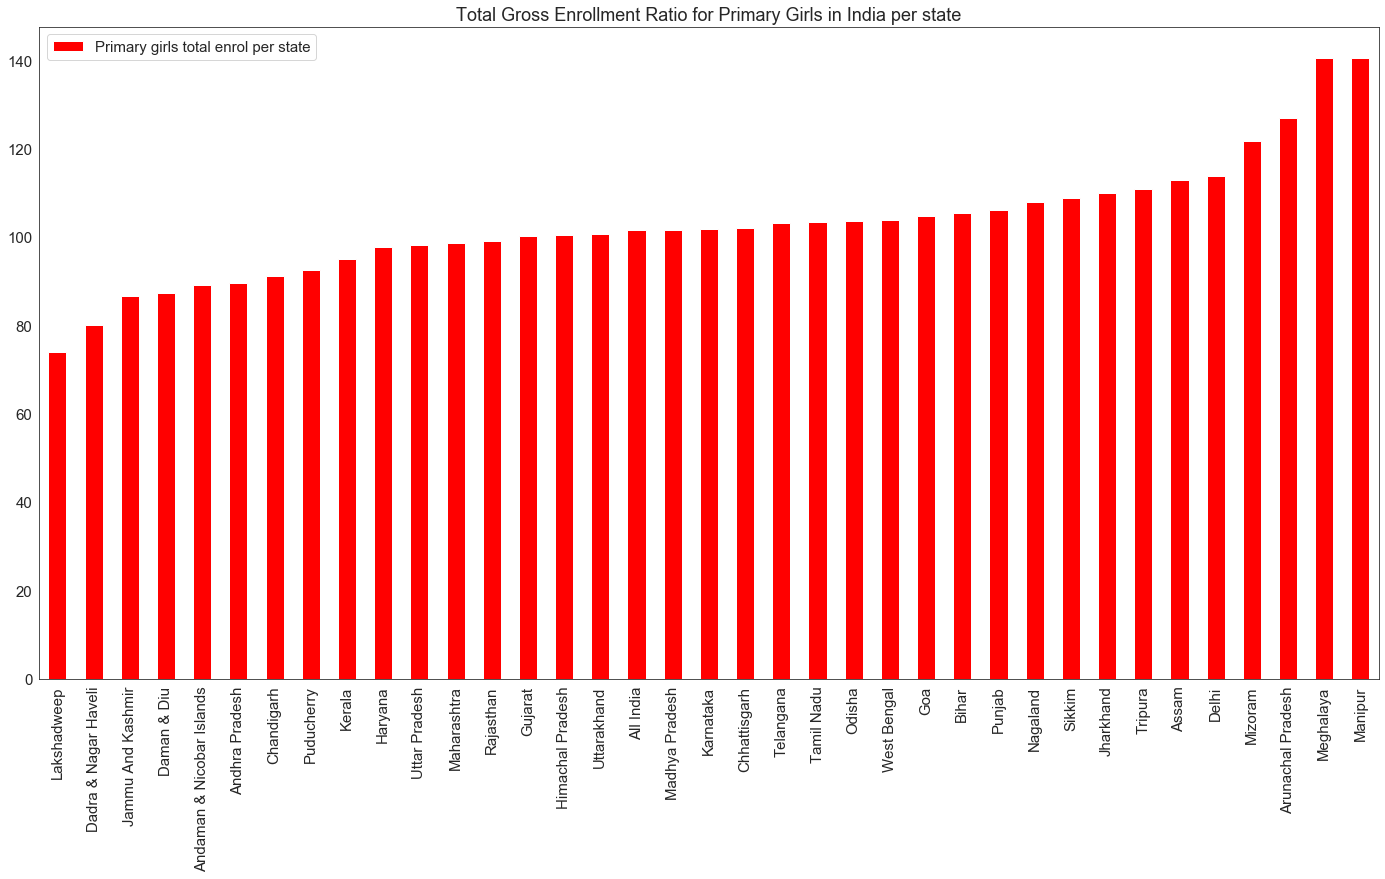

In [38]:
primary_girls_total_enrol_per_state.sort_values('Primary girls total enrol per state').plot(kind='bar', figsize=(24,12), color = 'r', title = 'Total Gross Enrollment Ratio for Primary Girls in India per state')
plt.savefig("pryg.png", dpi = 280)
plt.grid(False)

### Lakshadweep state has the least enrollment of primary school girls, while Manipur state enrols the most primary school girls.

## Upper_Primary Student Category Boys

In [39]:
Upper_primary_boys = [i for i in Upper_primary if i.split('_')[-1] == 'Boys']

In [40]:
Upper_primary_boys_total_enrol = []

for state in states:
    Upper_primary_boys_total_enrol.append(sum(mean_enrol_per_state.loc[state][Upper_primary_boys]))   # Getting the total drop out for boys in the primary Student category type.

In [41]:
Upper_primary_boys_total_enrol_per_state = pd.DataFrame(Upper_primary_boys_total_enrol, index=states, columns=['Upper Primary boys total enrol per state'])


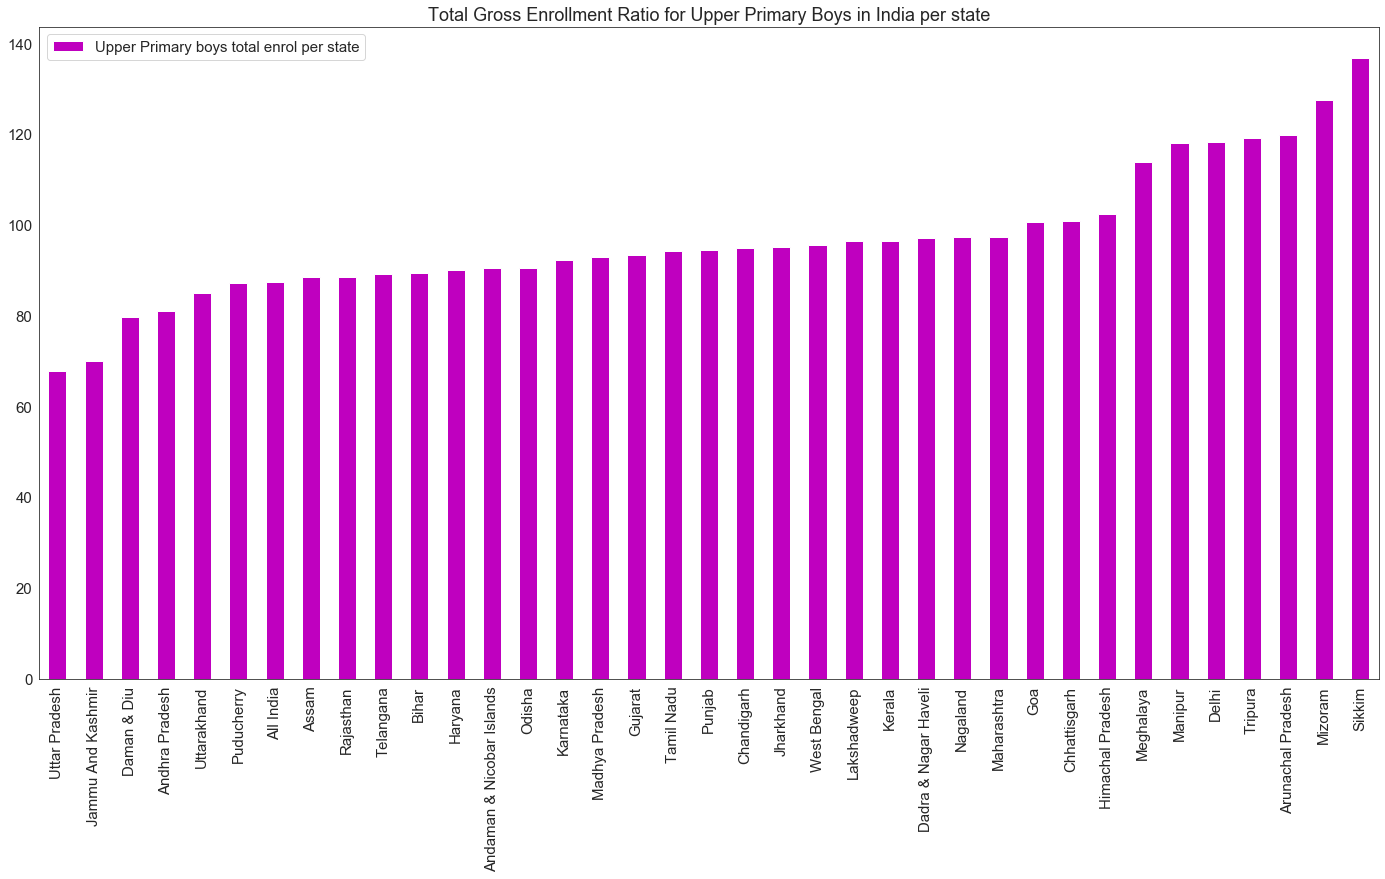

In [42]:
Upper_primary_boys_total_enrol_per_state.sort_values('Upper Primary boys total enrol per state').plot(kind='bar', 
                                                                                                      figsize=(24,12), 
                                                                                                      color = 'm',
                                                                                                      title = 'Total Gross Enrollment Ratio for Upper Primary Boys in India per state')
plt.savefig("upryb.png", dpi = 280)
plt.grid(False)

### 'Jammu and Kashmir' state has the least enrollment of Upper primary school boys, while Sikkim state enrols the most Upper primary school boys.

## Upper Primary Girls

In [43]:
Upper_primary_girls = [i for i in Upper_primary if i.split('_')[-1] == 'Girls']

In [44]:
Upper_primary_girls_total_enrol = []

for state in states:
    Upper_primary_girls_total_enrol.append(sum(mean_enrol_per_state.loc[state][Upper_primary_girls]))   # Getting the total drop out for girls in the primary Student category type.

In [45]:
Upper_primary_girls_total_enrol_per_state = pd.DataFrame(Upper_primary_girls_total_enrol, index=states, columns=['Upper Primary girls total enrol per state'])


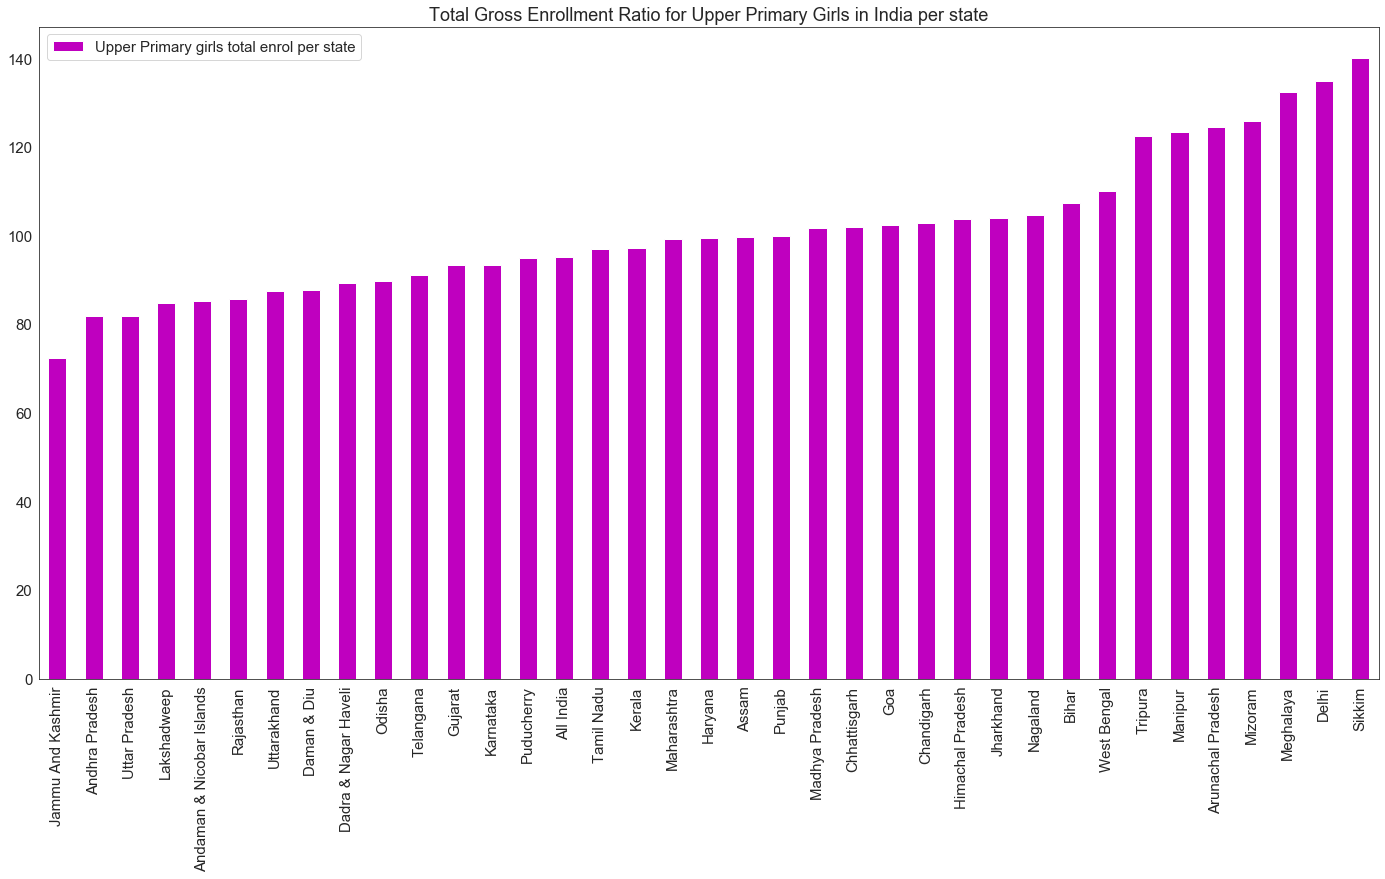

In [46]:
Upper_primary_girls_total_enrol_per_state.sort_values('Upper Primary girls total enrol per state').plot(kind='bar', color = 'm', figsize=(24,12), title = 'Total Gross Enrollment Ratio for Upper Primary Girls in India per state')
plt.savefig("upryg.png", dpi = 280)
plt.grid(False)

### 'Jammu And Kashmir' state has the least enrollment of Upper primary school girls, while Sikkim state enrols the most Upper primary school girls.

## Secondary Student Boys

In [47]:
secondary_boys = [i for i in secondary if i.split('_')[-1] == 'Boys']

In [48]:
secondary_boys_total_enrol = []

for state in states:
    secondary_boys_total_enrol.append(sum(mean_enrol_per_state.loc[state][secondary_boys]))   # Getting the total drop out for boys in the primary Student category type.

In [49]:
secondary_boys_total_enrol_per_state = pd.DataFrame(secondary_boys_total_enrol, index=states, columns=[' Secondary  boys total enrol per state'])


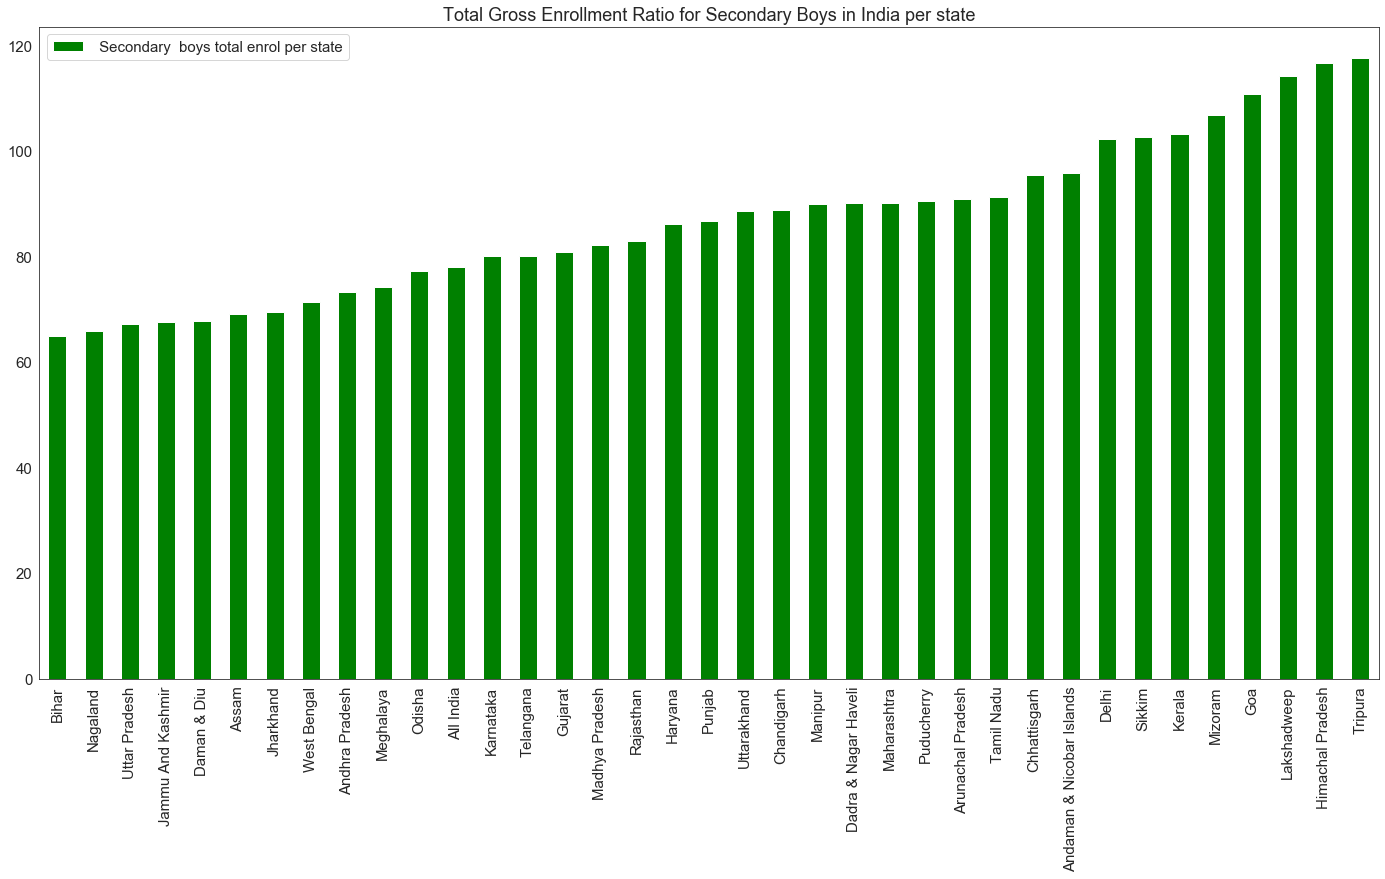

In [50]:
secondary_boys_total_enrol_per_state.sort_values(' Secondary  boys total enrol per state').plot(kind='bar', color = 'g', figsize=(24,12), title = 'Total Gross Enrollment Ratio for Secondary Boys in India per state')
plt.savefig("secb.png", dpi = 280)
plt.grid(False)

### Bihar state has the least enrollment of Secondary school boys, while Tripura state enrols the most secondary school boys.

## Secondary Student Girls

In [51]:
secondary_girls = [i for i in secondary if i.split('_')[-1] == 'Girls']

In [52]:
secondary_girls_total_enrol = []

for state in states:
    secondary_girls_total_enrol.append(sum(mean_enrol_per_state.loc[state][secondary_girls]))   # Getting the total drop out for girls in the primary Student category type.

In [53]:
secondary_girls_total_enrol_per_state = pd.DataFrame(secondary_girls_total_enrol, index=states, columns=[' Secondary  girls total enrol per state'])


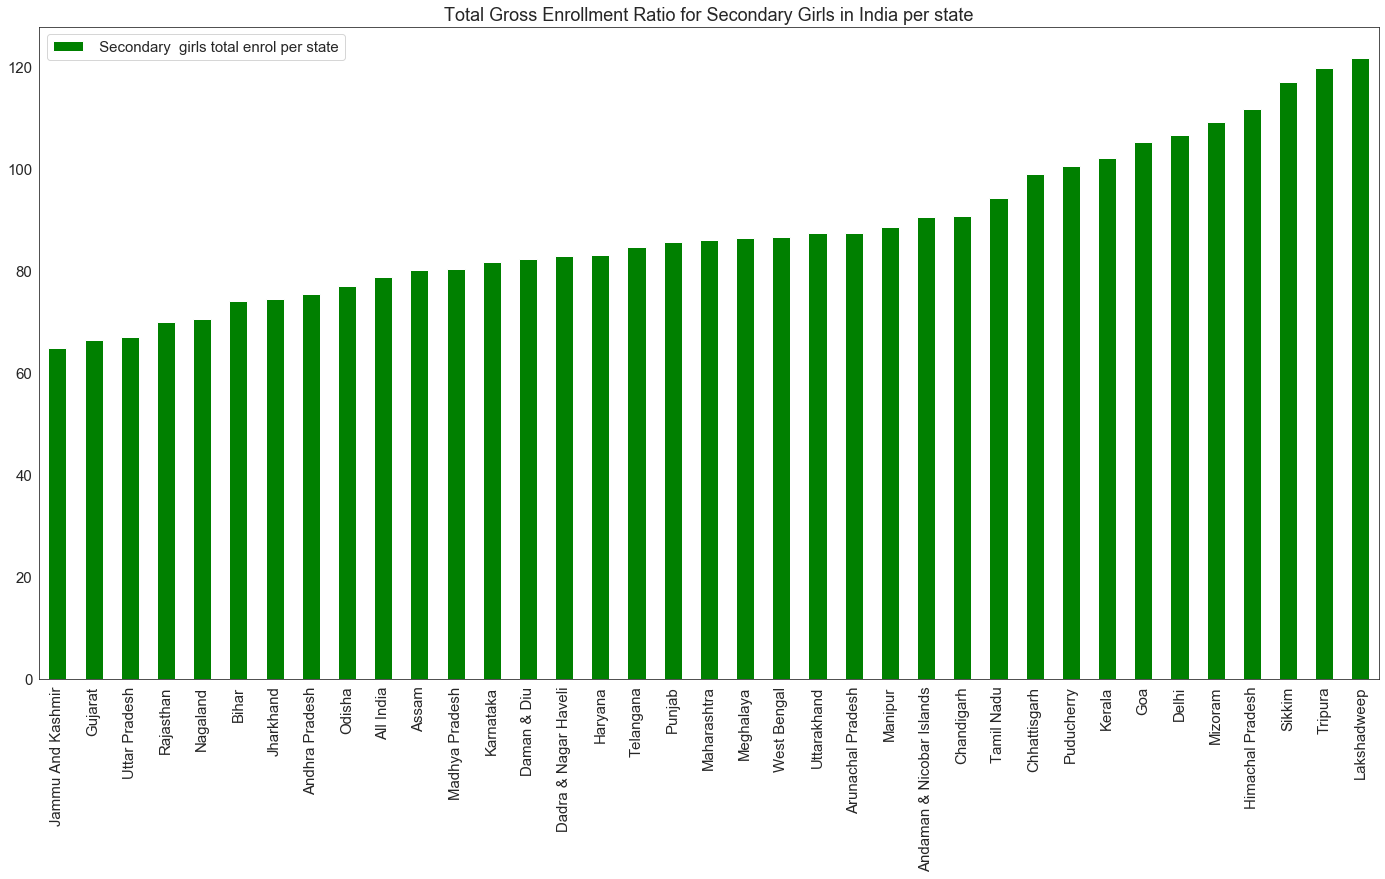

In [54]:
secondary_girls_total_enrol_per_state.sort_values(' Secondary  girls total enrol per state').plot(kind='bar', color = 'g', figsize=(24,12), title = 'Total Gross Enrollment Ratio for Secondary Girls in India per state')
plt.savefig("secg.png", dpi = 280)
plt.grid(False)

### 'Jammu And Kashmir' state has the least enrollment of Secondary school girls, while Lakshadweep state enrols the most Secondary school girls.

## Higher Secondary(HrSecondary) Boys

In [55]:
HrSecondary_boys = [i for i in HrSecondary if i.split('_')[-1] == 'Boys']

In [56]:
HrSecondary_boys_total_enrol = []

for state in states:
    HrSecondary_boys_total_enrol.append(sum(mean_enrol_per_state.loc[state][HrSecondary_boys]))   # Getting the total drop out for boys in the primary Student category type.

In [57]:
HrSecondary_boys_total_enrol_per_state = pd.DataFrame(HrSecondary_boys_total_enrol, index=states, columns=[' HrSecondary  boys total enrol per state'])


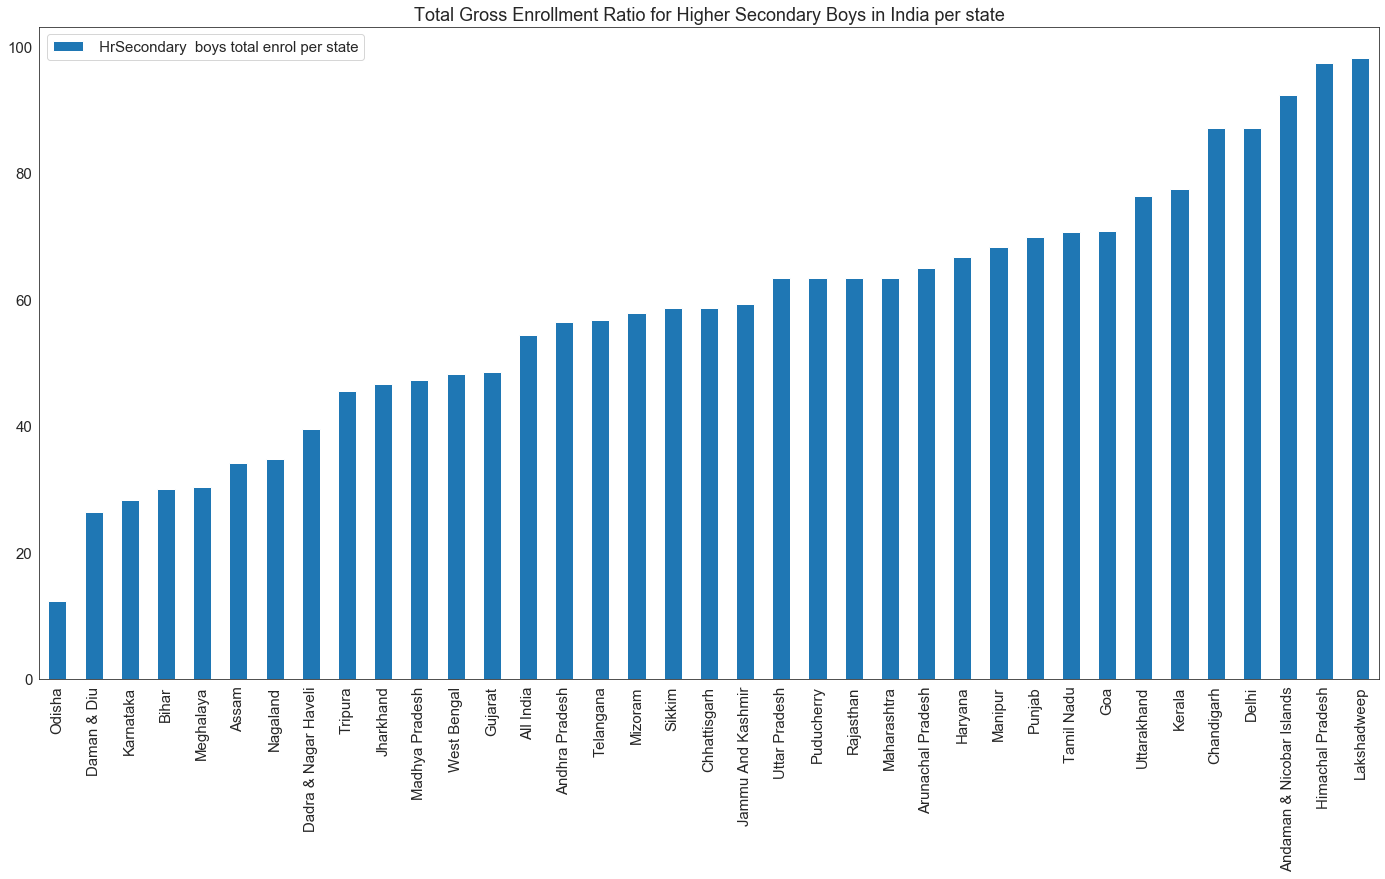

In [58]:
HrSecondary_boys_total_enrol_per_state.sort_values(' HrSecondary  boys total enrol per state').plot(kind='bar', figsize=(24,12), title = 'Total Gross Enrollment Ratio for Higher Secondary Boys in India per state')
plt.savefig("hsecb.png", dpi = 280)

### Odisha state has the least enrollment of Higher Secondary school boys, while Lakshadweep state enrols the most Higher Secondary school boys.

### Higher Secondary Girls

In [59]:
HrSecondary_girls = [i for i in HrSecondary if i.split('_')[-1] == 'Girls']

In [60]:
HrSecondary_girls_total_enrol = []

for state in states:
    HrSecondary_girls_total_enrol.append(sum(mean_enrol_per_state.loc[state][HrSecondary_girls]))   # Getting the total drop out for girls in the primary Student category type.

In [61]:
HrSecondary_girls_total_enrol_per_state = pd.DataFrame(HrSecondary_girls_total_enrol, index=states, columns=[' HrSecondary  girls total enrol per state'])


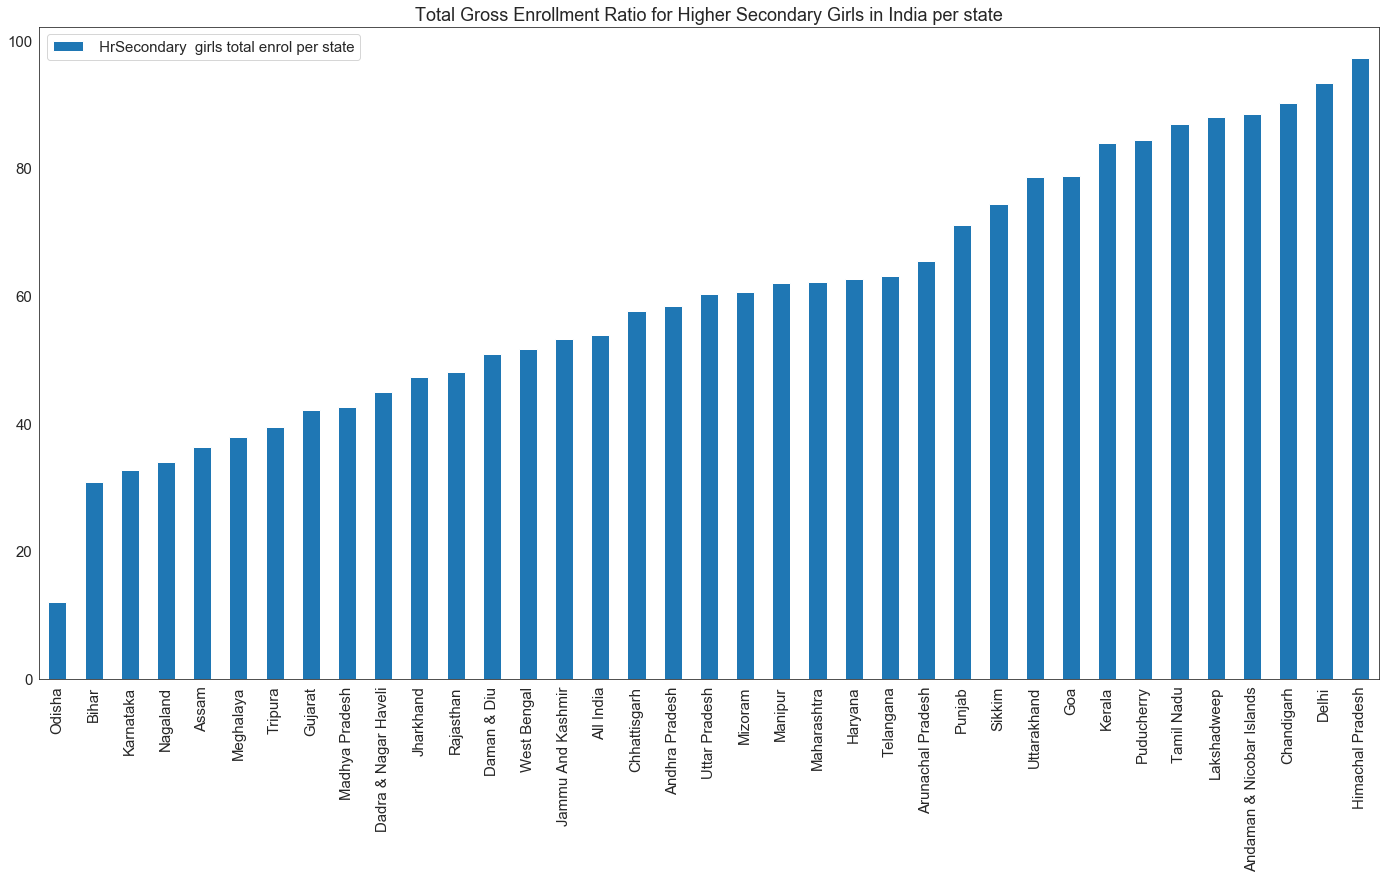

In [62]:
HrSecondary_girls_total_enrol_per_state.sort_values(' HrSecondary  girls total enrol per state').plot(kind='bar', figsize=(24,12), title = 'Total Gross Enrollment Ratio for Higher Secondary Girls in India per state')
plt.savefig("hsecg.png", dpi = 280)

### Odisha state has the least enrollment for Higher Secondary girls, while 'Himachal Pradesh' has the highest enrollment of Higher Secondary girls

## Boys and Girls Enrollment for some states

In [63]:
mizoram = enrol.iloc[np.where(enrol.State_UT == 'Mizoram')].reset_index(drop=True)
delhi = enrol.iloc[np.where(enrol.State_UT == 'Delhi')].reset_index(drop=True)
jammuK = enrol.iloc[np.where(enrol.State_UT == 'Jammu And Kashmir')].reset_index(drop=True)
nagaland = enrol.iloc[np.where(enrol.State_UT == 'Nagaland')].reset_index(drop=True)
all_india = enrol.iloc[np.where(enrol.State_UT == 'All India')].reset_index(drop=True)

In [64]:
delhi

,State_UT,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total
0,Delhi,2013-14,108.78,112.95,110.67,117.76,129.50,122.91,102.02,102.86,102.40,98.88,102.30,100.42
1,Delhi,2014-15,109.38,114.61,111.75,118.08,134.62,125.24,101.57,106.03,103.56,89.51,94.23,91.63
2,Delhi,2015-16,108.04,113.93,110.71,118.86,140.55,128.12,103.23,111.27,106.81,73.25,83.60,77.90


In [65]:
interest_states = [delhi, jammuK, mizoram, nagaland, all_india] 

### The interest_states were picked based on which states had high drop_out rate, gross enrollment, poor toilet facilities and all of india.

## Enrollment Ration for boys in selected states

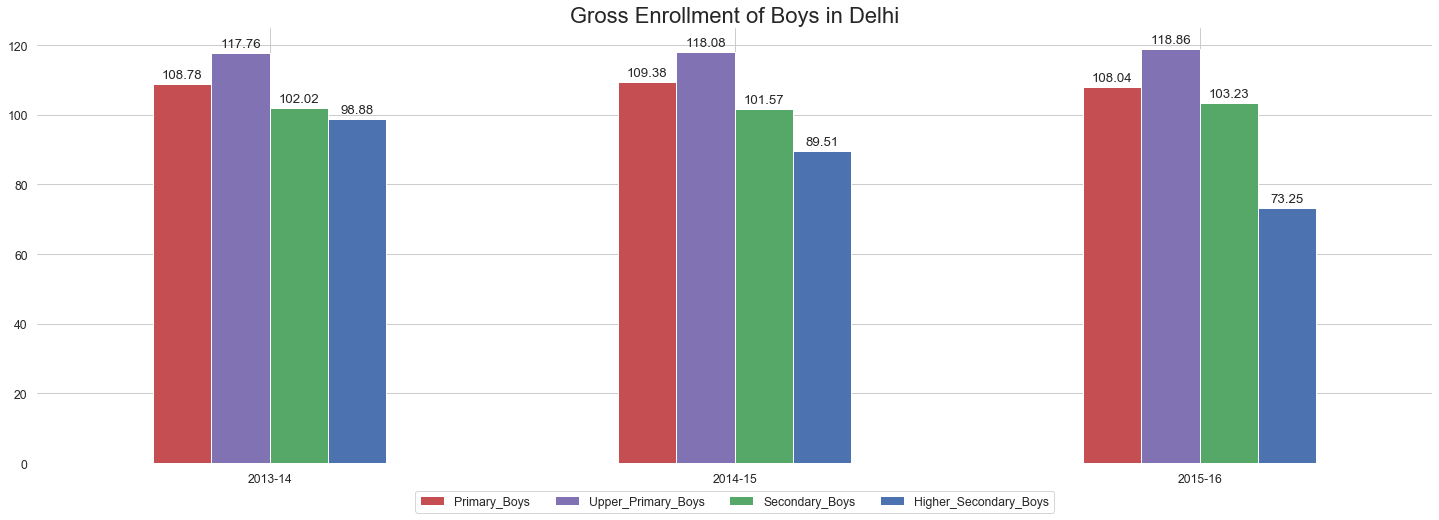

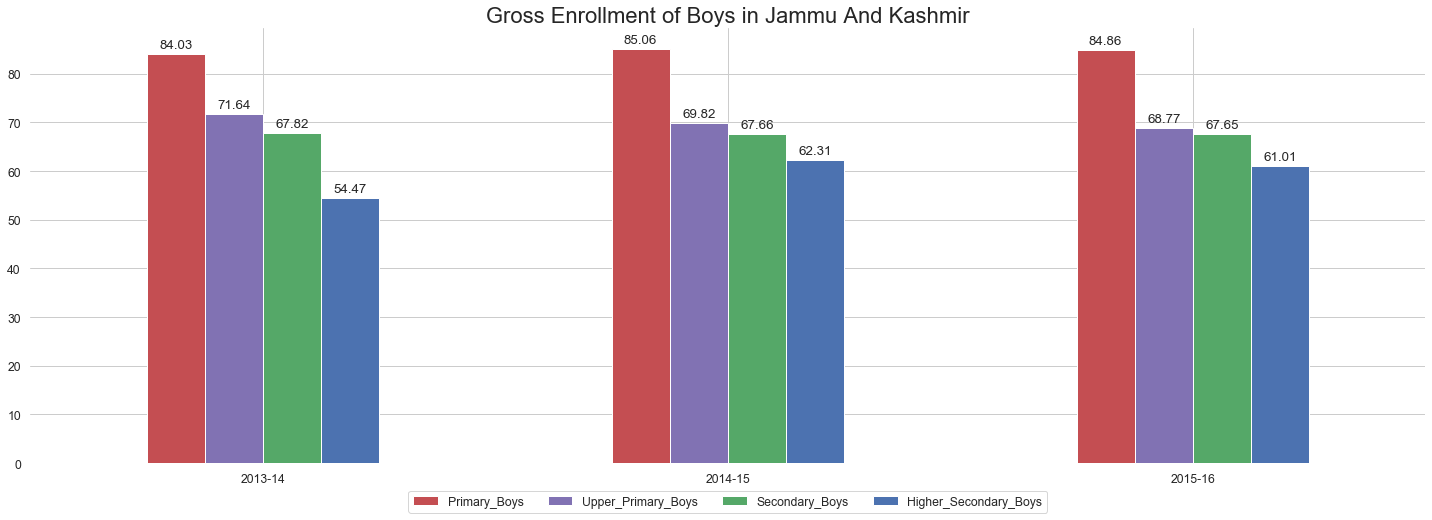

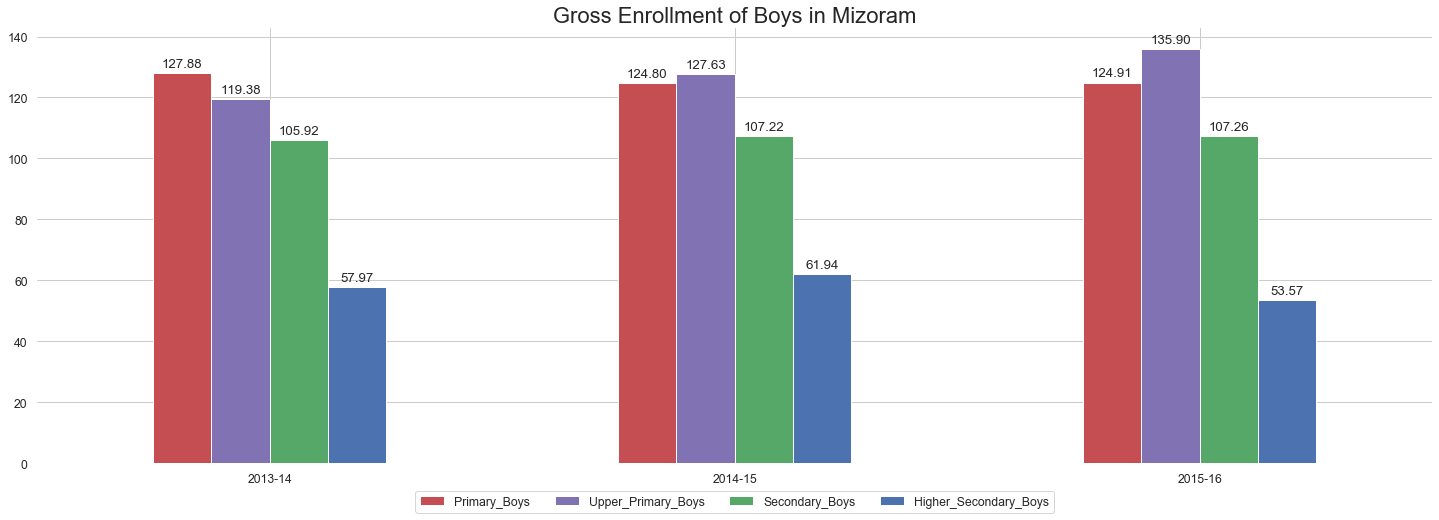

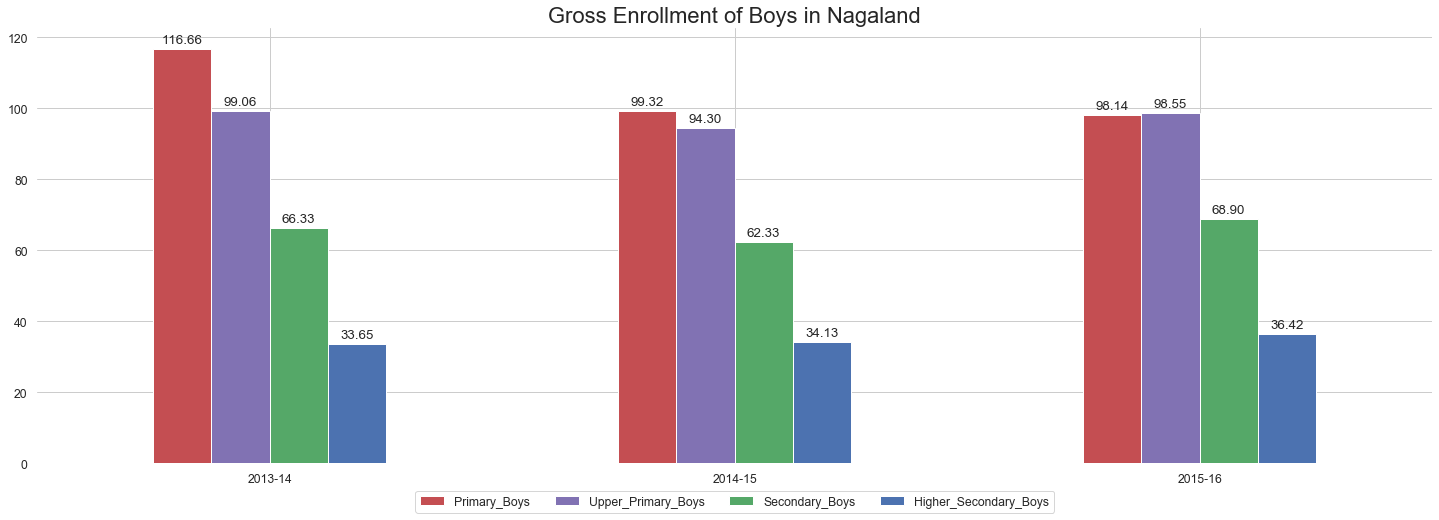

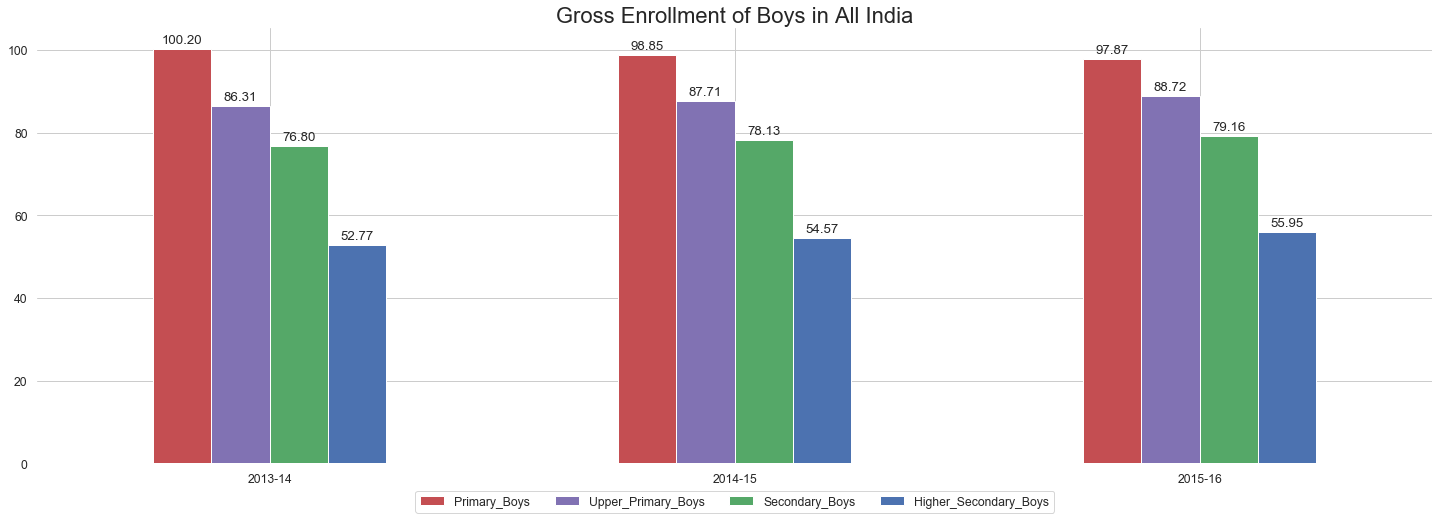

In [66]:
for interest in interest_states:
    sns.set(font_scale = 1.11)
    sns.set_style("whitegrid")
    ax = interest[boys].plot.bar(figsize=(25,8), color = 'rmgb')
    sns.despine(left=True, bottom=True)
    
    #label and title
    ax.set_xticklabels(np.arange(3))
    ax.set_title('Gross Enrollment of Boys in {}'.format(interest.State_UT.to_list()[0]),size=22)
    ax.set_xticklabels(list(all_india['Year']))
    for tick in ax.get_xticklabels():
        tick.set_rotation(-0)

    #annotations
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    #adjust legend
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=4)
    plt.savefig(str(interest.iloc[0,0]) +"b.png", dpi =300)


<h3> From the Charts above, Delhi state has the most enrolled boys in the HR secondary category and also overall student categories, while Nagaland state has the least enrollment of HR secondary boys </h3>

## Enrollment Ration for girls in selected states

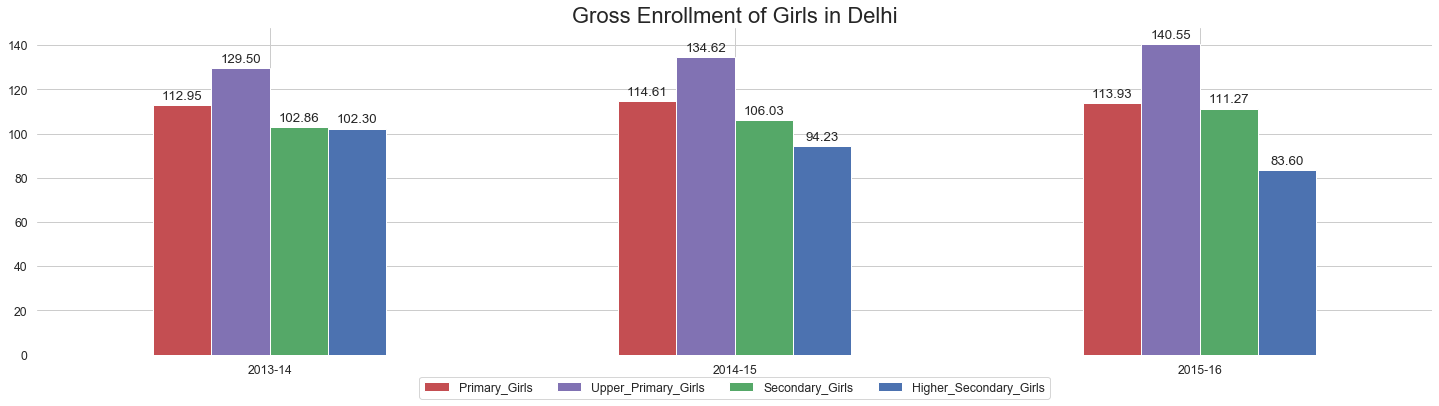

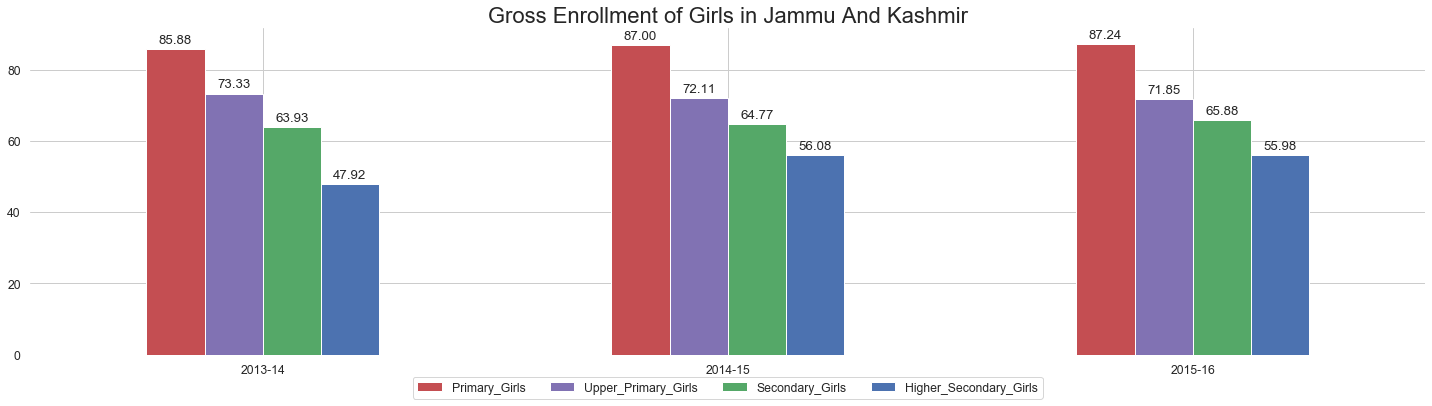

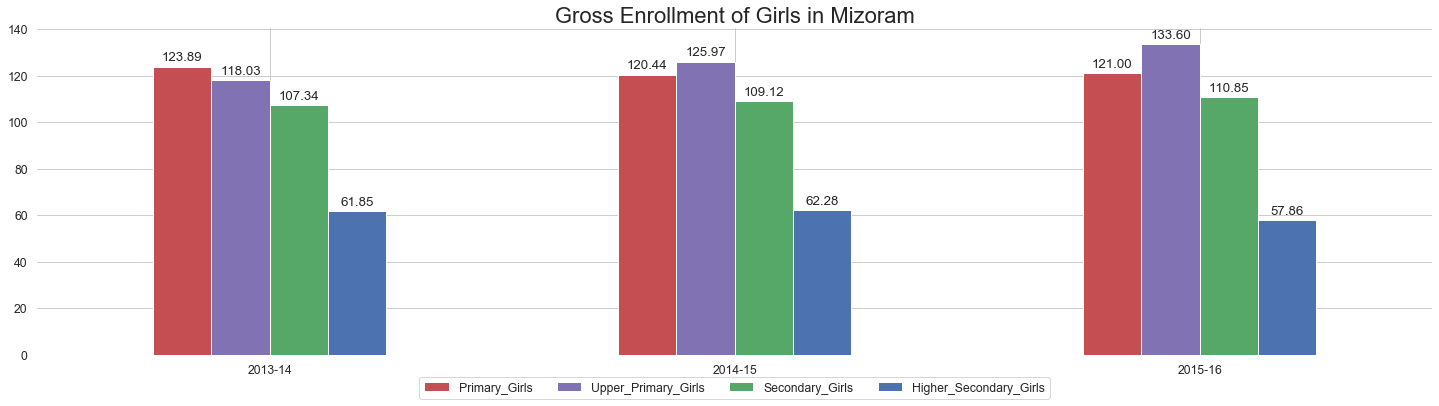

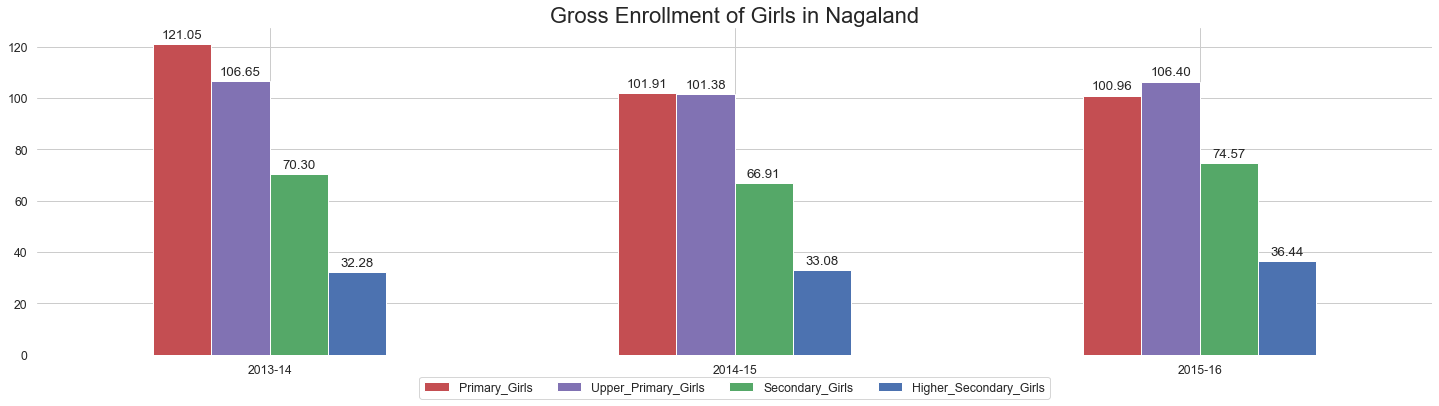

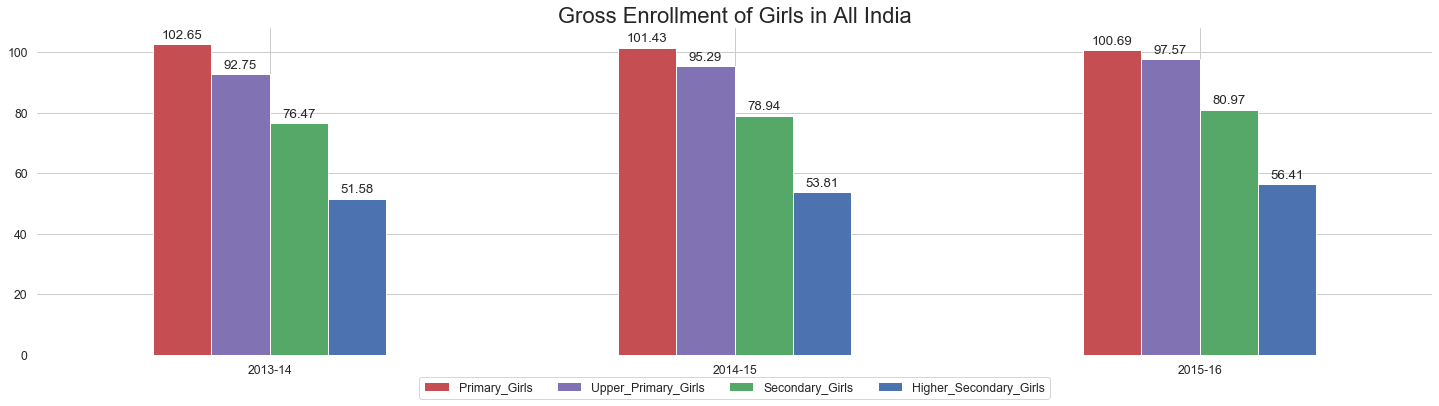

In [67]:
for interest in interest_states:
    sns.set(font_scale = 1.11)
    sns.set_style("whitegrid")
    ax = interest[girls].plot.bar(figsize=(25,6), color = 'rmgb')
    sns.despine(left=True, bottom=True)

    #label and title
    ax.set_xticklabels(np.arange(3))
    ax.set_title('Gross Enrollment of Girls in {}'.format(interest.State_UT.to_list()[0]),size=22)
    ax.set_xticklabels(list(all_india['Year']))
    for tick in ax.get_xticklabels():
        tick.set_rotation(-0)

    #annotations
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    #adjust legend
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=4)
    plt.savefig(str(interest.iloc[0,0]) +"g.png", dpi =300)


### From the charts above,Primary student category has the highest average of enrollments in the interest_states, while HR Secondary student have the least enrollment rate.

In [68]:
enrol.sort_values(by = "Year", inplace = True)
enrol

,State_UT,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total
0,Andaman & Nicobar Islands,2013-14,95.88,91.97,93.93,94.70,88.98,91.83,102.89,97.36,100.16,105.40,96.61,101.28
1,Andhra Pradesh,2013-14,96.62,96.87,96.74,82.81,84.38,83.57,73.76,76.77,75.20,59.83,60.83,60.30
2,Arunachal Pradesh,2013-14,129.12,127.77,128.46,112.64,115.27,113.94,88.37,84.89,86.65,65.16,65.38,65.27
3,Assam,2013-14,111.77,115.16,113.43,87.85,98.69,93.13,65.60,77.20,71.21,31.78,34.27,32.94
4,Bihar,2013-14,95.03,101.15,97.96,80.60,94.92,87.24,57.66,62.96,60.08,23.33,24.17,23.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,Arunachal Pradesh,2015-16,127.61,125.88,126.76,127.14,133.20,130.13,91.66,87.58,89.63,62.02,61.60,61.81
37,Andhra Pradesh,2015-16,84.88,84.05,84.48,81.12,81.56,81.33,74.63,76.48,75.51,58.28,62.27,60.16
36,Andaman & Nicobar Islands,2015-16,91.13,86.76,88.93,86.35,81.97,84.14,89.07,84.28,86.69,72.92,76.40,74.62
44,Daman & Diu,2015-16,79.68,84.95,82.03,74.86,84.64,79.15,67.05,81.44,72.97,16.32,32.27,21.54


In [69]:
enrol["Total_G_E_R"] = (enrol["Primary_Total"] +
                                                     enrol["Upper_Primary_Total"] +
                                                     enrol["Secondary_Total"] +
                                                     enrol["Higher_Secondary_Total"])/4
enrol.head()

,State_UT,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total,Total_G_E_R
0,Andaman & Nicobar Islands,2013-14,95.88,91.97,93.93,94.70,88.98,91.83,102.89,97.36,100.16,105.40,96.61,101.28,96.8000
1,Andhra Pradesh,2013-14,96.62,96.87,96.74,82.81,84.38,83.57,73.76,76.77,75.20,59.83,60.83,60.30,78.9525
2,Arunachal Pradesh,2013-14,129.12,127.77,128.46,112.64,115.27,113.94,88.37,84.89,86.65,65.16,65.38,65.27,98.5800
3,Assam,2013-14,111.77,115.16,113.43,87.85,98.69,93.13,65.60,77.20,71.21,31.78,34.27,32.94,77.6775
4,Bihar,2013-14,95.03,101.15,97.96,80.60,94.92,87.24,57.66,62.96,60.08,23.33,24.17,23.70,67.2450


In [70]:
e_bar = enrol.drop(list(enrol.columns)[2:-1], axis =1)
e_bar.sort_values(by= "State_UT", inplace = True)
e_bar = e_bar.reset_index(drop = True)

In [71]:
indexNames = e_bar[e_bar["State_UT"] == "All India"].index
e_bar.drop(indexNames, inplace = True)
e_bar

,State_UT,Year,Total_G_E_R
3,Andaman & Nicobar Islands,2013-14,96.8000
4,Andaman & Nicobar Islands,2015-16,83.5950
5,Andaman & Nicobar Islands,2014-15,91.7675
6,Andhra Pradesh,2015-16,75.3700
7,Andhra Pradesh,2014-15,72.9275
...,...,...,...
105,Uttarakhand,2014-15,89.1950
106,Uttarakhand,2013-14,87.9025
107,West Bengal,2015-16,85.9450
108,West Bengal,2014-15,83.4050


In [72]:
bar_pivot = e_bar.pivot(index= "State_UT", columns = ["Year"])
bar_pivot

Total_G_E_R                    
Year                          2013-14   2014-15   2015-16
State_UT                                                 
Andaman & Nicobar Islands     96.8000   91.7675   83.5950
Andhra Pradesh                78.9525   72.9275   75.3700
Arunachal Pradesh             98.5800  102.7475  102.0825
Assam                         77.6775   79.8925   78.8900
Bihar                         67.2450   75.0100   82.3875
Chandigarh                    94.1800   91.4250   86.8600
Chhattisgarh                  89.9825   92.3675   87.0700
Dadra & Nagar Haveli          76.3250   75.2150   77.6375
Daman & Diu                   73.4750   70.3800   63.9225
Delhi                        109.1000  108.0450  105.8850
Goa                           96.9500   98.9175   95.3275
Gujarat                       78.7500   77.8875   77.6325
Haryana                       87.0800   85.9075   81.9025
Himachal Pradesh             104.6800  104.7425  101.4425
Jammu And Kashmir             68.6575   70.6200   70.3975
Jharkhand                     79.8950   82.2300   83.4800
Karnataka                     72.1625   77.4500   79.8575
Kerala                        95.9625   93.0275   92.7075
Lakshadweep                   99.9875   93.8525   89.7200
Madhya Pradesh                85.0675   80.8500   78.5575
Maharashtra                   85.2125   87.3200   88.6850
Manipur                      102.2350  102.2875  105.4400
Meghalaya                     85.5150   94.3775  101.8525
Mizoram                      102.7950  104.9375  105.6175
Nagaland                      80.6700   74.0950   77.4575
Odisha                        66.7075   68.1800   78.5350
Puducherry                    90.4700   86.2175   83.8950
Punjab                        89.7825   89.2150   89.3325
Rajasthan                     79.4550   79.2625   81.7850
Sikkim                       106.0625  108.2600  110.3725
Tamil Nadu                    92.3000   91.7750   93.4675
Telangana                         NaN   83.7600   84.0700
Tripura                       96.3350   98.6225   99.4700
Uttar Pradesh                 74.2575   75.2700   73.9400
Uttarakhand                   87.9025   89.1950   86.9325
West Bengal                   81.6475   83.4050   85.9450

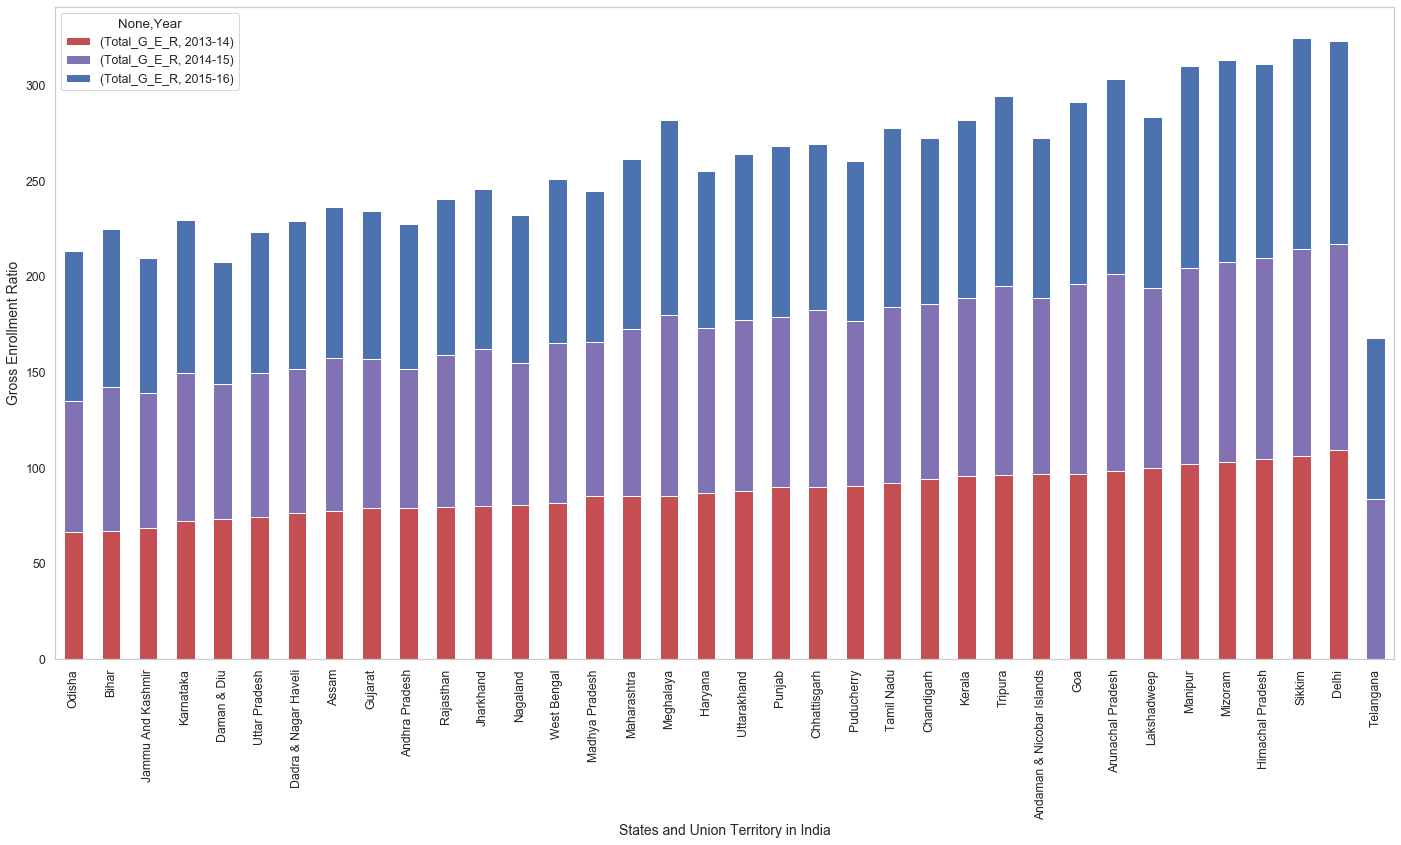

In [79]:
bar_pivot.sort_values(("Total_G_E_R", "2013-14")).plot.bar(figsize = (24,12), stacked = True, color = 'rmb')
plt.grid(False)
plt.ylabel("Gross Enrollment Ratio", fontsize = 14, fontweight = 8)
plt.xlabel("States and Union Territory in India", fontsize = 14, fontweight = 8)
plt.savefig("stacked_e.png", dpi = 280, bbox_inches = "tight")